In [1]:
using VSTom
using PyPlot

In [2]:
a=read_ncdf("data/reduced_synthetic_transfer_matrix.cdf")
b=read_ncdf("data/test_distributions.cdf")

Dict{String,Any} with 5 entries:
  "bimax"    => [1.1783262130824066e10 1.0636908581331907e10 7.156967775254817e…
  "P"        => [-0.9866666793823242 -0.9866666793823242 -0.9866666793823242 -0…
  "transp"   => [2.6681379352576438e8 2.9156223069045725e9 4.943426441458407e9 …
  "E"        => [1.0 3.0 5.0 7.0 9.0 11.0 13.0 15.0 17.0 19.0 21.0 23.0 25.0 27…
  "gaussian" => [0.0054280300491629865 0.02481817575077173 0.10474997057676766 …

In [3]:
A_full = a["transfer_matrix"]
energy_full = a["energy"]
pitch_full = a["pitch"];

In [22]:
nenergy = 10
npitch = 10
A,energy,pitch = resize_transfer_matrix(A_full,energy_full,pitch_full,nenergy,npitch);

In [23]:
transp_full = b["transp"]
transp = bilinear(transp_full,energy_full,pitch_full,energy,pitch);

In [25]:
x_full = reshape(transp_full,75*50)
x_red = reshape(transp,nenergy*npitch);

In [26]:
dE_full = abs(energy_full[2]-energy_full[1])
dP_full = abs(pitch_full[2]-pitch_full[1])
dE = abs(energy[2]-energy[1])
dP = abs(pitch[2]-pitch[1])

0.21925926208496094

In [27]:
spec_full = A_full*x_full*(dE_full*dP_full)
spec_red = A*x_red*(dE*dP);

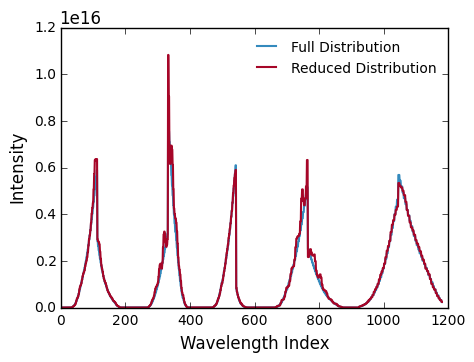

In [37]:
ind = collect(1:length(spec_full))
fig,ax = plt.subplots()
fig[:set_size_inches]((5,3.5))
ax[:plot](ind,spec_full,lw=1.5,label="Full Distribution",color="#348ABD")
ax[:plot](ind,spec_red,lw=1.5,label="Reduced Distribution",color="#A60628")
ax[:tick_params](labelsize="small")
ax[:set_xlabel]("Wavelength Index")
ax[:set_ylabel]("Intensity")
#ax[:set_yscale]("log")
ax[:legend](loc=1,frameon=false,fontsize="small")
fig[:savefig]("full_red_spectra.png",dpi=1200,bbox_inches="tight")